# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Proyecto 2: Resultados Iniciales
### Reto 04: Predicción de compradores recurrentes: cuestionar la línea base - Negocios

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169
- Mario Antonio Guerra Morales, 21008
- David Jonathan Aragon Vasquez, 21053

**Curso:** Data Science  
**Sección:** 10  
**Grupo** 4  

---

Guatemala, 28 de octubre de 2024


##### 🫳 Para la descarga del dataset de este reto, es necesario la creación de una cuenta dentro de Alibaba Cloud. Para facilitar este proceso se proporcionan los elementos a descargar en estos enlaces:
- Data_Format1: https://drive.google.com/file/d/1jgsaSM0wypPMUWaNlXy5s_kO0uiXNzES/view?usp=sharing
- Data_Format2: https://drive.google.com/file/d/1dnMeaon-ovASN2HEI1WSNfnw-7lyINAh/view?usp=drivesdk
- sample_submission.csv:

In [4]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.ticker as ticker
from imblearn.over_sampling import SMOTE

In [3]:
!pip install tabulate imblearn tensorflow statsmodels pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 16.7 MB/s eta 0:00:00


### 📩 Carga de los datos

In [ ]:
dataTrain_timestamp = pd.read_csv('data/dataTrain_balanced_timestamp.csv')
dataTrain = pd.read_csv('data/dataTrain_balanced.csv')

In [ ]:
dataTrain_timestamp.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label,time_stamp
0,0,34176,6.0,0.0,944,408895,1505,7370,1,0,0,0,1,1,-1,"DatetimeIndex(['2023-11-07'], dtype='datetime6..."
1,1,34176,6.0,0.0,412,17235,1604,4396,8,0,0,0,8,7,-1,"DatetimeIndex(['2023-08-18', '2023-08-18', '20..."
2,2,34176,6.0,0.0,1945,231901,662,2758,7,0,0,0,7,3,-1,"DatetimeIndex(['2023-08-18', '2023-08-18', '20..."
3,3,34176,6.0,0.0,4752,174142,821,6938,1,0,0,0,1,1,-1,"DatetimeIndex(['2023-10-27'], dtype='datetime6..."
4,4,34176,6.0,0.0,643,716371,1505,968,0,0,0,1,1,1,-1,"DatetimeIndex(['2023-10-24'], dtype='datetime6..."


In [ ]:
dataTrain.head()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
0,0,34176,6.0,0.0,944,408895,1505,7370,1,0,0,0,1,1,-1
1,1,34176,6.0,0.0,412,17235,1604,4396,8,0,0,0,8,7,-1
2,2,34176,6.0,0.0,1945,231901,662,2758,7,0,0,0,7,3,-1
3,3,34176,6.0,0.0,4752,174142,821,6938,1,0,0,0,1,1,-1
4,4,34176,6.0,0.0,643,716371,1505,968,0,0,0,1,1,1,-1


In [ ]:
print("Data Train Timestamp\n")
dataTrain_timestamp.info()
dataTrain_timestamp.count()

print("\nData Train without Timestamp\n")
dataTrain.info()
dataTrain.count()

Data Train Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300811 entries, 0 to 20300810
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0.1       int64  
 1   user_id            int64  
 2   age_range          float64
 3   gender             float64
 4   merchant_id        int64  
 5   item_id            int64  
 6   category_id        int64  
 7   brand_id           int64  
 8   clicks             int64  
 9   add_to_cart        int64  
 10  purchases          int64  
 11  add_to_favorites   int64  
 12  total_actions      int64  
 13  unique_item_count  int64  
 14  label              int64  
 15  time_stamp         object 
dtypes: float64(2), int64(13), object(1)
memory usage: 2.4+ GB

Data Train without Timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20300811 entries, 0 to 20300810
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 

,0
Unnamed: 0.1,20300811
user_id,20300811
age_range,20300811
gender,20300811
merchant_id,20300811
item_id,20300811
category_id,20300811
brand_id,20300811
clicks,20300811
add_to_cart,20300811


In [ ]:
dataTrain.describe()

,Unnamed: 0.1,user_id,age_range,gender,merchant_id,item_id,category_id,brand_id,clicks,add_to_cart,purchases,add_to_favorites,total_actions,unique_item_count,label
count,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07,2.030081e+07
mean,3.513824e+06,2.116874e+05,3.037811e+00,3.359498e-01,2.512599e+03,5.559079e+05,8.667681e+02,4.163890e+03,8.630119e+00,5.517021e-06,9.027854e-01,3.033002e-01,1.008873e+01,4.353554e+00,0.000000e+00
std,2.027742e+06,1.215602e+05,1.710790e+00,4.892762e-01,1.287225e+03,3.217158e+05,3.902042e+02,2.163676e+03,2.279894e+01,2.410922e-03,8.730307e-01,1.382527e+00,2.359851e+01,8.344923e+00,8.164966e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.765179e+06,1.056220e+05,2.000000e+00,0.000000e+00,1.480000e+03,2.750960e+05,5.960000e+02,2.368000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,-1.000000e+00
50%,3.513432e+06,2.122770e+05,3.000000e+00,0.000000e+00,2.492000e+03,5.548880e+05,8.490000e+02,4.073000e+03,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00
75%,5.261091e+06,3.166630e+05,4.000000e+00,7.078987e-01,3.596000e+03,8.307000e+05,1.180000e+03,5.910000e+03,9.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.000000e+00
max,7.030722e+06,4.241700e+05,8.000000e+00,2.000000e+00,4.995000e+03,1.113166e+06,1.671000e+03,8.477000e+03,6.962000e+03,2.000000e+00,2.020000e+02,3.980000e+02,6.963000e+03,1.194000e+03,1.000000e+00


## Regresión Logística

<ipython-input-11-81675d774253>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-11-81675d774253>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-11-81675d774253>:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-11-81675d774253>:51: UserWarning: Could not infer format, so each element will be parsed indiv

Accuracy: 0.704666290491293
Confusion Matrix:
[[1330616    4859   18408]
 [  98413  868768  385856]
 [  50727  640840  661676]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      0.98      0.94   1353883
           0       0.57      0.64      0.61   1353037
           1       0.62      0.49      0.55   1353243

    accuracy                           0.70   4060163
   macro avg       0.70      0.70      0.70   4060163
weighted avg       0.70      0.70      0.70   4060163



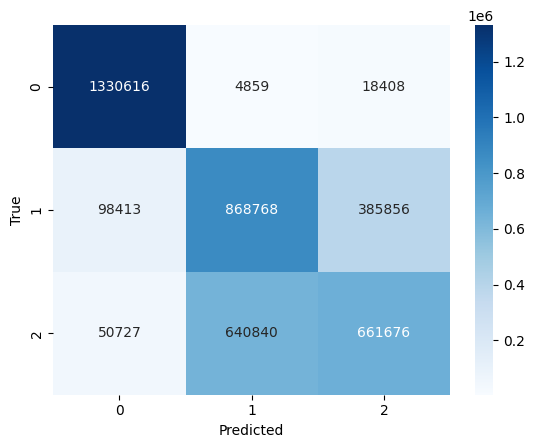

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Función para reducir el uso de memoria ajustando los tipos de datos
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                df[col] = df[col].astype(np.float32)

    return df

# Definir el tamaño del chunk
chunk_size = 100000  # Puedes ajustar este tamaño según tu memoria disponible

# Leer el dataset por fragmentos y procesarlo
data_chunks = pd.read_csv('data/dataTrain_balanced_timestamp.csv', chunksize=chunk_size, usecols=[
    'user_id', 'age_range', 'gender', 'merchant_id', 'item_id', 'category_id',
    'brand_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites',
    'total_actions', 'unique_item_count', 'label', 'time_stamp'
])

# Lista para almacenar los chunks procesados
data_list = []

for chunk in data_chunks:
    # Reducir el uso de memoria en cada chunk
    chunk = reduce_mem_usage(chunk)

    # Convertir la columna 'time_stamp' a tipo datetime
    chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')

    # Codificar las columnas categóricas con LabelEncoder
    le = LabelEncoder()
    chunk['gender'] = le.fit_transform(chunk['gender'].astype(str))
    chunk['age_range'] = le.fit_transform(chunk['age_range'].astype(str))

    # Agregar el chunk procesado a la lista
    data_list.append(chunk)

# Concatenar todos los chunks procesados
dataTrain_timestamp = pd.concat(data_list, axis=0)

# Definir características (X) y etiqueta (y)
X = dataTrain_timestamp.drop(columns=['label', 'time_stamp'])  # Excluir 'label' y 'time_stamp'
y = dataTrain_timestamp['label']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instanciar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir resultados
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Redes Neuronales (LSTM y GRU)

In [ ]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import matplotlib.pyplot as plt

# Función para reducir el uso de memoria ajustando los tipos de datos
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                df[col] = df[col].astype(np.float32)
    return df

# Carga y preprocesamiento de datos
chunk_size = 100000
data_chunks = pd.read_csv('data/dataTrain_balanced_timestamp.csv', chunksize=chunk_size, usecols=[
    'user_id', 'age_range', 'gender', 'merchant_id', 'item_id', 'category_id',
    'brand_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites',
    'total_actions', 'unique_item_count', 'label', 'time_stamp'
])

data_list = []
for chunk in data_chunks:
    chunk = reduce_mem_usage(chunk)
    chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
    le = LabelEncoder()
    chunk['gender'] = le.fit_transform(chunk['gender'].astype(str))
    chunk['age_range'] = le.fit_transform(chunk['age_range'].astype(str))
    data_list.append(chunk)

dataTrain_timestamp = pd.concat(data_list, axis=0)
dataTrain_timestamp = dataTrain_timestamp.sort_values(by=['user_id', 'time_stamp'])

X = dataTrain_timestamp.drop(columns=['label', 'time_stamp'])
y = dataTrain_timestamp['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

sequence_length = 10
X_seq, y_seq = [], []
for i in range(len(X) - sequence_length):
    X_seq.append(X[i:i + sequence_length])
    y_seq.append(y.iloc[i + sequence_length])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


<ipython-input-7-3193ebd9351d>:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-7-3193ebd9351d>:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-7-3193ebd9351d>:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk['time_stamp'] = pd.to_datetime(chunk['time_stamp'], errors='coerce')
<ipython-input-7-3193ebd9351d>:45: UserWarning: Could not infer format, so each element will be parsed individua

In [8]:
# Definición y entrenamiento del modelo
model_lstm_optimized = Sequential([
    LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(16),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm_optimized.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_lstm_optimized.fit(X_train, y_train, epochs=2, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Guardar el modelo y el escalador
model_lstm_optimized.save('model_lstm_optimized.h5')
joblib.dump(scaler, 'scaler.pkl')

Epoch 1/2
126880/126880 [==============================] - 1355s 11ms/step - loss: -63315.7148 - accuracy: 0.4357 - val_loss: -185161.4219 - val_accuracy: 0.4231
Epoch 2/2
126880/126880 [==============================] - 1356s 11ms/step - loss: -422417.1875 - accuracy: 0.4196 - val_loss: -717529.1875 - val_accuracy: 0.4338


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


126881/126881 [==============================] - 395s 3ms/step


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

126881/126881 [==============================] - 385s 3ms/step


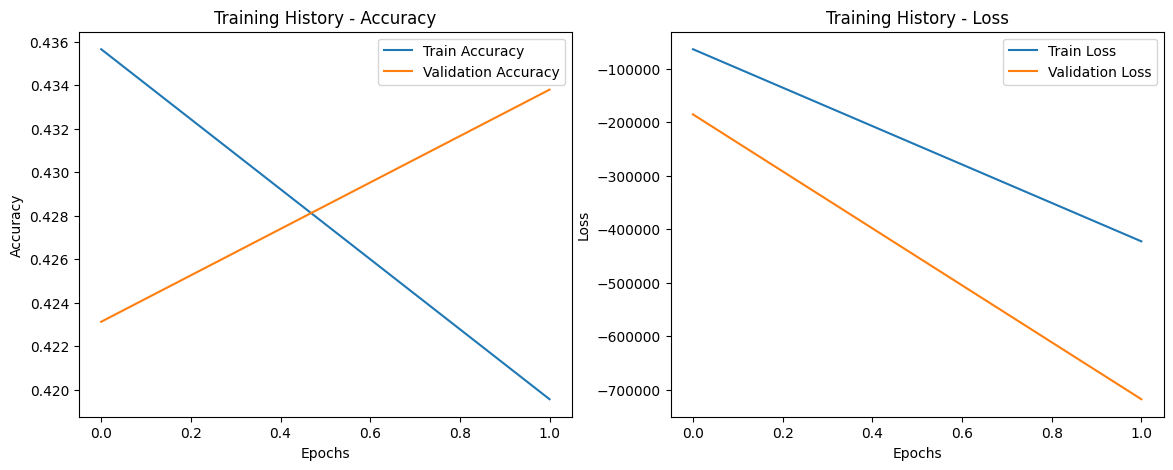

In [12]:
import numpy as np
import json
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score
from tensorflow.keras.models import load_model
import joblib
import matplotlib.pyplot as plt

# Cargar el modelo y el escalador
model = load_model('model_lstm_optimized.h5')
scaler = joblib.load('scaler.pkl')

# Mapear -1 a 0 en y_test
y_test = np.where(y_test == -1, 0, y_test)

# Predicción y cálculo de métricas
y_pred_proba = model.predict(X_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# Función para calcular y guardar métricas
def generate_metrics(history, y_true, y_pred_proba, y_pred):
    metrics = {
        "f1_score": f1_score(y_true, y_pred, average='binary'),
        "recall": recall_score(y_true, y_pred, average='binary'),
        "accuracy": accuracy_score(y_true, y_pred),
        "auc": roc_auc_score(y_true, y_pred_proba)
    }
    training_history = {
        "accuracy": history.history['accuracy'],
        "val_accuracy": history.history['val_accuracy'],
        "loss": history.history['loss'],
        "val_loss": history.history['val_loss']
    }
    return metrics, training_history

# Calcular y guardar métricas
metrics, training_history = generate_metrics(history, y_test, y_pred_proba, y_pred)

# Guardar métricas y el historial de entrenamiento
with open('metrics.json', 'w') as f:
    json.dump(metrics, f)
with open('training_history.json', 'w') as f:
    json.dump(training_history, f)

# Gráficas de métricas
def plot_training_history(history, title="Training History"):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Mostrar gráficas de entrenamiento
plot_training_history(history)

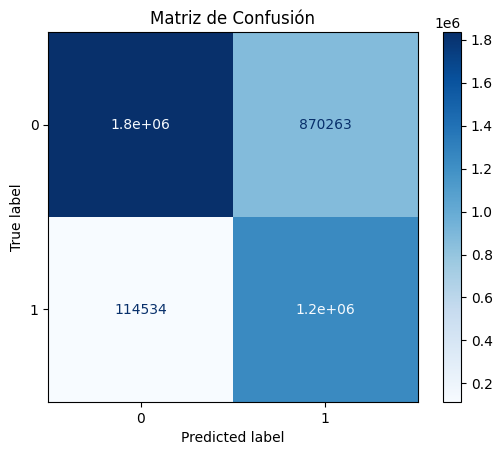

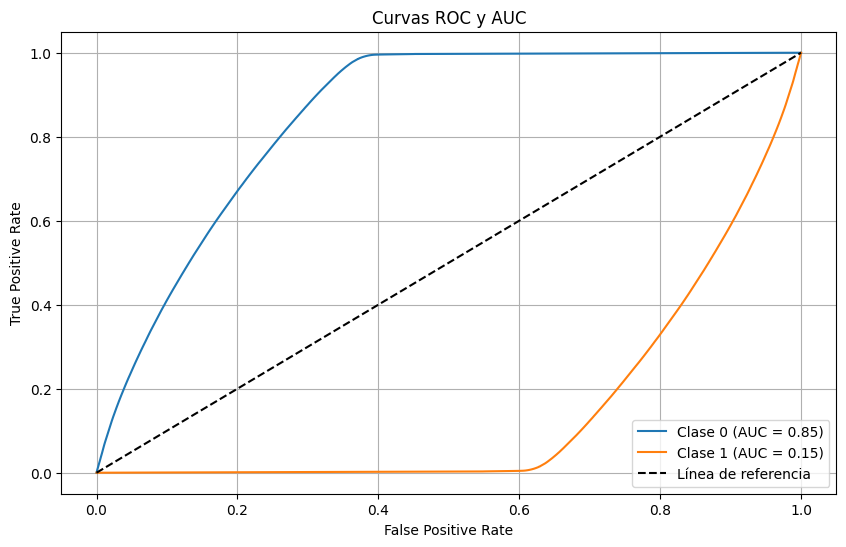

Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.94      0.68      0.79   2705931
     Clase 1       0.59      0.92      0.72   1354230

    accuracy                           0.76   4060161
   macro avg       0.76      0.80      0.75   4060161
weighted avg       0.82      0.76      0.76   4060161



In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import label_binarize
import numpy as np

# 1. Gráfica de la matriz de confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# 2. Gráfica de la curva ROC y AUC (Clase 0)
def plot_roc_with_inverse(y_true, y_pred_proba):
    # Calcular la curva ROC y el AUC para la Clase 1
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Crear la curva inversa para la Clase 0
    fpr_inverse = 1 - fpr
    tpr_inverse = 1 - tpr
    roc_auc_inverse = 1 - roc_auc

    # Graficar ambas curvas
    plt.figure(figsize=(10, 6))

    # Curva ROC para la Clase 1
    plt.plot(fpr, tpr, label=f'Clase 0 (AUC = {roc_auc:.2f})')

    # Curva ROC inversa para la Clase 0
    plt.plot(fpr_inverse, tpr_inverse, label=f'Clase 1 (AUC = {roc_auc_inverse:.2f})')

    # Línea de referencia
    plt.plot([0, 1], [0, 1], 'k--', label="Línea de referencia")

    # Configuración del gráfico
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC y AUC')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

plot_roc_with_inverse(y_test, y_pred_proba)

# 3. Generar el reporte de clasificación de métricas de desempeño (precisión, recall, F1-score)
def display_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, target_names=["Clase 0", "Clase 1"])
    print("Reporte de Clasificación:\n")
    print(report)

display_classification_report(y_test, y_pred)


In [31]:
def preprocess_and_predict(new_data, scaler, model):
    # Preprocesamiento similar al de entrenamiento
    new_data = scaler.transform(new_data)
    new_sequences = []

    # Crear secuencias
    sequence_length = 10  # Mismo que en el entrenamiento
    for i in range(len(new_data) - sequence_length):
        new_sequences.append(new_data[i:i + sequence_length])

    new_sequences = np.array(new_sequences)

    # Hacer predicciones
    predictions = model.predict(new_sequences)
    return predictions
